Загрузка данных и вывод первых 5 строк

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
df = pd.read_csv('pretty_car_price_dataset.csv') 
print(df.head(5))

        Бренд  Модель   Год  Объём двигателя Тип топлива     Трансмиссия  \
0         Kia     Rio  2020              4.2      Diesel          Manual   
1   Chevrolet  Malibu  2012              2.0      Hybrid       Automatic   
2    Mercedes     GLA  2020              4.2      Diesel       Automatic   
3        Audi      Q5  2023              2.0    Electric          Manual   
4  Volkswagen    Golf  2003              2.6      Hybrid  Semi-Automatic   

   Пробег  Количество дверей  Количество владельцев  Стоимость  
0  289944                  3                      5       8501  
1    5356                  2                      3      12092  
2  231440                  4                      2      11171  
3  160971                  2                      1      11780  
4  286618                  3                      3       2867  


Разделение данных на обучающую и тестовую выборки

In [3]:
y = df['Тип топлива']
X = df.drop(columns=['Тип топлива'], axis=1)

# Преобразование категориальных признаков в числовые
X = pd.get_dummies(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=10)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(7501, 49) (2501, 49) (7501,) (2501,)


Классификация LDA и SVM

In [4]:
# Масштабирование данных для SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_valid)

lda = LinearDiscriminantAnalysis()
svm = SVC(kernel='linear', random_state=10)

lda.fit(X_train, y_train)
lda_pred = lda.predict(X_valid)
lda_accuracy = accuracy_score(y_valid, lda_pred)

svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_valid, svm_pred)

print("LDA - Правильно классифицировано:", (y_valid == lda_pred).sum())
print("LDA - Неправильно классифицировано:", (y_valid != lda_pred).sum())
print("SVM - Правильно классифицировано:", (y_valid == svm_pred).sum())
print("SVM - Неправильно классифицировано:", (y_valid != svm_pred).sum())

LDA - Правильно классифицировано: 1861
LDA - Неправильно классифицировано: 640
SVM - Правильно классифицировано: 1880
SVM - Неправильно классифицировано: 621


Оценка точности и изменение пропорций выборки

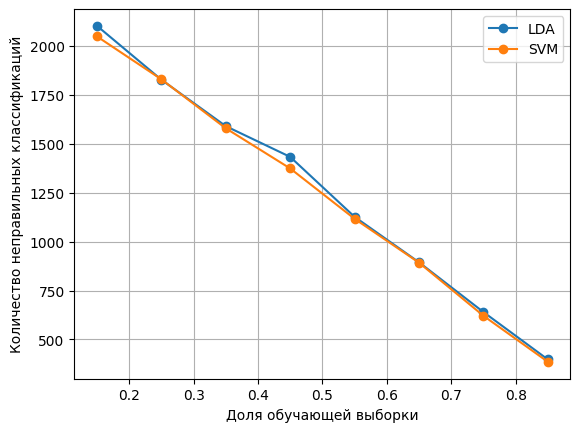

In [6]:
import matplotlib.pyplot as plt

proportions = [(0.85, 0.15), (0.75, 0.25), (0.65, 0.35), (0.55, 0.45), (0.45, 0.55), (0.35, 0.65), (0.25, 0.75), (0.15, 0.85)]
lda_scores = []
svm_scores = []

for train_size, _ in proportions:
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=train_size, random_state=10)
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    lda_pred = lda.predict(X_valid)
    lda_scores.append((y_valid != lda_pred).sum())
    
    svm = SVC(kernel='linear', random_state=10)
    svm.fit(X_train_scaled, y_train)
    svm_pred = svm.predict(X_valid_scaled)
    svm_scores.append((y_valid != svm_pred).sum())

plt.plot([p[0] for p in proportions], lda_scores, label='LDA', marker="o")
plt.plot([p[0] for p in proportions], svm_scores, label='SVM', marker="o")
plt.xlabel('Доля обучающей выборки')
plt.ylabel('Количество неправильных классификаций')
plt.grid(True)
plt.legend()
plt.show()